In [1]:
import pandas as pd
import numpy as np
import hashlib
import seaborn as sb
import matplotlib.pyplot as plt

# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)





In [2]:
file_id = '1RDMz-mbAwkVyLKg4gqB3DoAVowYi6VDJ' #<-- You add in here the id from you google drive file, you can find it


download = drive.CreateFile({'id': file_id})


# Download the file to a local disc
download.GetContentFile('depressionTrain.csv')  
train = pd.read_csv('depressionTrain.csv') 
train.head()

,GENDER,ZIMBABWEAN,MARITAL_STATUS,AGE,OCCUPATION,CHILDREN,EDU_LEVEL,HOUSEHOLD_SIZE,2_WEEK_SAD,NO_CARE,...,BE_ALONE,FAILURE_FEELING,DEPRESSED,DEPRESSION_TREATMENT,FAMILY_DEPRESSED,BORROW_MONEY,SAVINGS,ENJOY_JOB,SALARY_SUSTAIN,DEBT
0,Female,Yes,Not married,21.0,Student,No,University Level,4.0,Yes,No,...,NaN,NaN,No,No,NaN,No,Yes,Yes,No,No
1,Male,Yes,Married,31.0,Employeed,Yes,University Level,5.0,Yes,Yes,...,Yes,NaN,No,No,No,Yes,No,No,No,Yes
2,Male,Yes,Not married,16.0,Student,No,Ordinary Level,4.0,No,No,...,No,NaN,No,No,No,No,Yes,No,No,No
3,Male,Yes,Not married,22.0,Student,No,University Level,4.0,Yes,Yes,...,Yes,NaN,No,No,No,No,No,Yes,No,No
4,Female,Yes,Not married,18.0,Student,No,Advance Level,5.0,Yes,Yes,...,Yes,NaN,No,No,No,No,No,NaN,No,No


In [3]:
file_id = '1mxrhWAffzjBghqmfISz39cgKQxjUhhVP' #<-- You add in here the id from you google drive file, you can find it


download = drive.CreateFile({'id': file_id})


# Download the file to a local disc
download.GetContentFile('depressionTest.csv')  
test = pd.read_csv('depressionTest.csv') 
test.head()

,GENDER,ZIMBABWEAN,MARITAL_STATUS,AGE,OCCUPATION,CHILDREN,EDU_LEVEL,HOUSEHOLD_SIZE,2_WEEK_SAD,NO_CARE,...,BE_ALONE,FAILURE_FEELING,DEPRESSED,DEPRESSION_TREATMENT,FAMILY_DEPRESSED,BORROW_MONEY,SAVINGS,ENJOY_JOB,SALARY_SUSTAIN,DEBT
0,Female,Yes,Married,21.0,Student,No,University Level,4.0,Yes,No,...,NaN,NaN,No,No,NaN,No,Yes,Yes,No,No
1,Male,Yes,Married,31.0,Employeed,Yes,University Level,5.0,Yes,Yes,...,Yes,NaN,No,No,No,Yes,No,No,No,Yes
2,Female,Yes,Married,16.0,Student,No,Ordinary Level,4.0,No,No,...,No,NaN,No,No,No,No,Yes,No,No,No
3,Male,Yes,Not married,22.0,Student,No,University Level,4.0,Yes,Yes,...,Yes,NaN,No,No,No,No,No,Yes,No,No
4,Male,Yes,Not married,18.0,Student,No,Advance Level,5.0,Yes,Yes,...,Yes,NaN,No,No,No,No,No,NaN,No,No


In [4]:
#Description of data
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GENDER                221 non-null    object 
 1   ZIMBABWEAN            223 non-null    object 
 2   MARITAL_STATUS        223 non-null    object 
 3   AGE                   270 non-null    float64
 4   OCCUPATION            223 non-null    object 
 5   CHILDREN              223 non-null    object 
 6   EDU_LEVEL             220 non-null    object 
 7   HOUSEHOLD_SIZE        218 non-null    float64
 8    2_WEEK_SAD           223 non-null    object 
 9   NO_CARE               223 non-null    object 
 10  LOST_WEIGHT           223 non-null    object 
 11  EAT_MORE              223 non-null    object 
 12  LOST_APPETITE         223 non-null    object 
 13  TROUBLE _SLEEPING     223 non-null    object 
 14  TIRED                 173 non-null    object 
 15  TAKE_DRUGS            2

In [5]:
#Frequency Distribution
train[ "DEPRESSED"].value_counts() 


No     215
Yes      8
Name: DEPRESSED, dtype: int64

In [6]:
train_set = train.replace('Yes', 1).replace('No', 0).replace('Not married',0).replace('Married', 1)
test_set = test.replace('Yes', 1).replace('No', 0).replace('Not married',0).replace('Married', 1)


<Axes: xlabel='GENDER'>

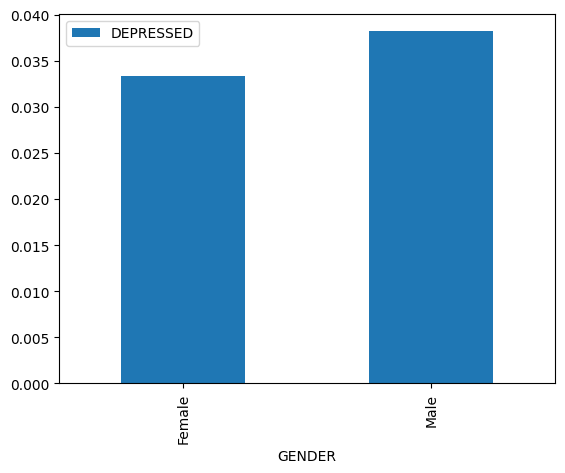

In [7]:
#Explore Gender - Depressed  relationship
gender_pivot = train_set.pivot_table(index="GENDER",values="DEPRESSED")
gender_pivot.plot.bar()

<Axes: xlabel='EDU_LEVEL'>

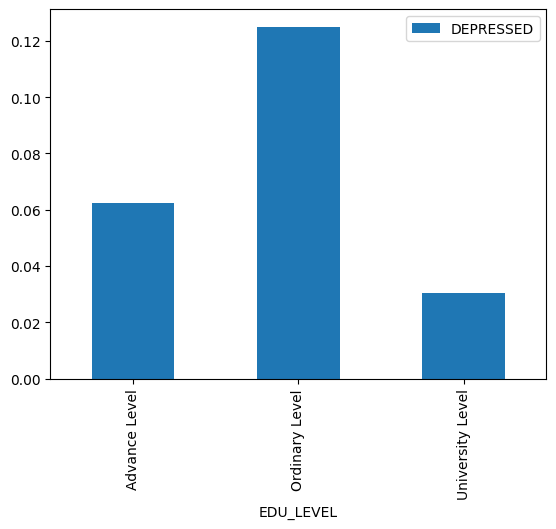

In [8]:
#Explore Education - Depression relationship
education_pivot = train_set.pivot_table(index="EDU_LEVEL",values="DEPRESSED")
education_pivot.plot.bar()

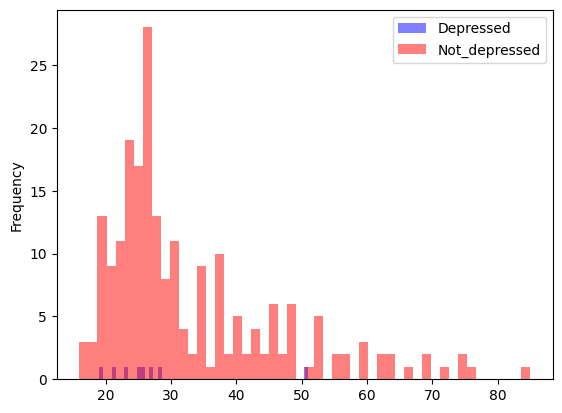

In [9]:
#Explore  numerical Age - Depressed relationship
#compare ages of those who are depressed and those who are not
depressed = train_set[train_set["DEPRESSED"] == 1]
not_depressed     = train_set[train_set["DEPRESSED"] == 0]
depressed["AGE"].plot.hist(alpha=0.5,color='blue',bins=50)
not_depressed["AGE"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Depressed','Not_depressed'])
plt.show()

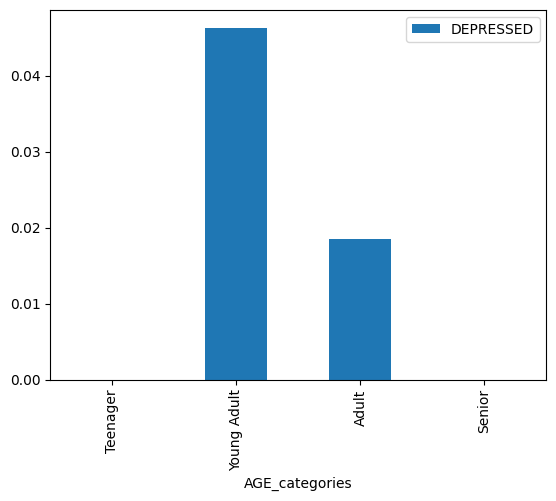

In [10]:
# convert age to a categorical variable
#use pandas.cut() for creating bins
cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior'] 

def process_age(df,cut_points,label_names,attribute):
    df[attribute] = df[attribute].fillna(-0.5)
    df["AGE_categories"] = pd.cut(df[attribute],cut_points,labels=label_names)
    return df

train_set = process_age(train_set,cut_points,label_names,'AGE')
test_set = process_age(test_set,cut_points,label_names,'AGE')

age_cat_pivot = train_set.pivot_table(index="AGE_categories",values="DEPRESSED")
age_cat_pivot.plot.bar()
plt.show()


In [11]:
#Checking on how much each attribute correlates with depression
corr_matrix = train_set.corr()
corr_matrix["DEPRESSED"].sort_values(ascending=False)

<ipython-input-11-2408e7ce3fcc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


DEPRESSION_TREATMENT    1.000000
DEPRESSED               1.000000
SALARY_SUSTAIN          0.194803
FAILURE_FEELING         0.170312
TROUBLE _SLEEPING       0.142876
SUICIDE_THOUGHT         0.141470
DEBT                    0.138240
TAKE_DRUGS              0.100453
EAT_MORE                0.099053
LOST_WEIGHT             0.088736
FAMILY_DEPRESSED        0.078431
BE_ALONE                0.073753
TIRED                   0.064593
 2_WEEK_SAD             0.058731
BORROW_MONEY            0.056810
NO_CARE                 0.048763
ZIMBABWEAN              0.047994
HOUSEHOLD_SIZE          0.044475
CHILDREN                0.010816
LOST_APPETITE          -0.010187
ENJOY_JOB              -0.029588
FAILURE_DECISIONS      -0.045317
MARITAL_STATUS         -0.060547
AGE                    -0.076064
SAVINGS                -0.122575
Name: DEPRESSED, dtype: float64

In [12]:
test_sets = test_set.replace('Male', 0).replace('Female', 1).replace('Student', 1).replace('Employeed', 2).replace('Unemployeed', 3).replace('Self-employeed', 4)
train_sets = train_set.replace('Male', 0).replace('Female', 1).replace('Student', 1).replace('Employeed', 2).replace('Unemployeed', 3).replace('Self-employeed', 4)

In [13]:
train_data =train_sets.fillna(0)
test_data = test_sets.fillna(0)


In [16]:
from sklearn.model_selection import train_test_split

# columns = ['GENDER', 'SAVINGS', 'DEBT', 'SALARY_SUSTAIN', 'ENJOY_JOB', 'BORROW_MONEY',
#            'FAMILY_DEPRESSED', 'MARITAL_STATUS', 'AGE', 'OCCUPATION', 'CHILDREN',
#            'HOUSEHOLD_SIZE', 'NO_CARE', 'BE_ALONE', 'FAILURE_FEELING', 'FAMILY_DEPRESSED']
columns = ['GENDER', 'MARITAL_STATUS', 'LOST_WEIGHT', ' 2_WEEK_SAD', 'TROUBLE _SLEEPING', 'TAKE_DRUGS', 'SUICIDE_THOUGHT',
               'FAILURE_DECISIONS', 'DEBT', 'DEPRESSED']
all_X = train_data[columns]
all_y = train_data['DEPRESSED']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=0)
train_X.shape





(216, 10)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(train_X, train_y)


RandomForestClassifier()

In [18]:
# #Prediction

# accuracy = accuracy_score(test_y, predictions)
# accuracy

# Actual class predictions
# rf_predictions = model.predict(test_y)
# # Probabilities for each class
# rf_probs = model.predict_proba(test_y)[:, 1]

# Actual class predictions
rf_predictions = model.predict(test_X)

# Probabilities for each class
rf_probs = model.predict_proba(test_X)[:, 1]



In [19]:
from sklearn.metrics import classification_report
print(classification_report(test_y, rf_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, rf_predictions)
pd.DataFrame(conf_matrix, columns=['Depressed', 'Not_depressed'], index=[['Depressed', 'Not_depressed']])

,Depressed,Not_depressed
Depressed,51,0
Not_depressed,0,3


In [21]:
import joblib

# Save the model to a file
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']